In [1]:
#import pandas
import pandas as pd

### Show the dataframe shape.


In [2]:
#import dataframe
df1 = pd.read_csv('marketing_customer_analysis.csv')
df1 #see the datafram

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [3]:
[rowdf1,coldf1] = df1.shape
print ("The dataframe has " + str(rowdf1) + " rows and " + str(coldf1) + " columns")

The dataframe has 10910 rows and 26 columns


### Standardize header names.

In [4]:
df1.columns = df1.columns.str.lower()
df1.rename(columns={"unnamed: 0": "id", "employmentstatus": "employment status"}, inplace = True) #all the names in lower case

In [5]:
col_names_lst =[] #for each variable name, substitute the space " " with the underscore "_"
for i in range(coldf1):
    col_names = df1.columns[i]
    col_names = col_names.replace(" ", "_")
    col_names_lst.append(col_names)
df1.columns = col_names_lst

### Which columns are categorical and which ones numerical?

In [6]:
#df1.info()
list_object_var = []
list_num_var = []

for i in range(coldf1):
    #print(i)
    col_name = df1.columns[i]
    col_type = df1[col_name].dtypes
    if col_type == 'object':
        list_object_var.append(df1.columns[i])
    else:
        list_num_var.append(df1.columns[i])
print("According to the type automatically detected by Python this is the list of the categorical variables:\n " + str(list_object_var) + "\nand this is the list of the numerical variables:\n " + str(list_num_var))

According to the type automatically detected by Python this is the list of the categorical variables:
 ['customer', 'state', 'response', 'coverage', 'education', 'effective_to_date', 'employment_status', 'gender', 'location_code', 'marital_status', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size', 'vehicle_type']
and this is the list of the numerical variables:
 ['id', 'customer_lifetime_value', 'income', 'monthly_premium_auto', 'months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies', 'total_claim_amount']


However, looking at the variables, I would suggest these changes:
id = categorical 

### Check and deal with NaN values.

In [7]:
#df1.info()
#first inspect the nan in the id/customer column and if there are, drop them
id_na = df1[df1["customer"].isna() == True]
[row_na, col_na] = id_na.shape
if row_na > 0:
    df1 = df1.dropna(subset = ["customer"])
else:
    print("There are no NaN in the ID columns, so let's check the NaN in the rest of the variables")
    

There are no NaN in the ID columns, so let's check the NaN in the rest of the variables


In [8]:
#since there are no nan in the id/customer column, I will expect the other variables.
#create a dictionary with the list of the variables that have NaN and the number of nan they have
variables_with_nan = {}
for i in range(coldf1):
    col_name = df1.columns[i]
    df2 = df1[df1[col_name].isna() == True] 
    [rowdf2, coldf2] = df2.shape
    if rowdf2 > 0:
        variables_with_nan[col_name] = rowdf2
variables_with_nan        


{'state': 631,
 'response': 631,
 'months_since_last_claim': 633,
 'number_of_open_complaints': 633,
 'vehicle_class': 622,
 'vehicle_size': 622,
 'vehicle_type': 5482}

In [9]:
#since the NaN are a considerable numbers, I can't drop all these cases
#for the categoriacal variables I will substitute the nan with "unknown"
#for the numerical variables I will substitute the nan with the median of the variable
df1["state"] = df1["state"].fillna("unknown")
df1["response"] = df1["response"].fillna("unknown")
df1["vehicle_class"] = df1["vehicle_class"].fillna("unknown")
df1["vehicle_size"] = df1["vehicle_size"].fillna("unknown")
df1["vehicle_type"] = df1["vehicle_type"].fillna("unknown")

median_MSLC = df1["months_since_last_claim"].median()
median_NoOC = df1["number_of_open_complaints"].median()
df1["months_since_last_claim"] = df1["months_since_last_claim"].fillna("median_MSLC")
df1["number_of_open_complaints"] = df1["number_of_open_complaints"].fillna("median_NoOC")

df1.info() #to check if all the NaN have been resolved

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             10910 non-null  int64  
 1   customer                       10910 non-null  object 
 2   state                          10910 non-null  object 
 3   customer_lifetime_value        10910 non-null  float64
 4   response                       10910 non-null  object 
 5   coverage                       10910 non-null  object 
 6   education                      10910 non-null  object 
 7   effective_to_date              10910 non-null  object 
 8   employment_status              10910 non-null  object 
 9   gender                         10910 non-null  object 
 10  income                         10910 non-null  int64  
 11  location_code                  10910 non-null  object 
 12  marital_status                 10910 non-null 

### Datetime format 
- Extract the months from the dataset and store in a separate column. 
- Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.

In [10]:
#the only column containing datetime info is "effective to date"
#converting effective to date from object to datetime class
df1["effective_to_date"] = pd.to_datetime(df1["effective_to_date"])
df1["effective_to_date"].info #to check whether the transformation worked

<bound method Series.info of 0       2011-02-18
1       2011-01-18
2       2011-02-10
3       2011-01-11
4       2011-01-17
           ...    
10905   2011-01-19
10906   2011-01-06
10907   2011-02-06
10908   2011-02-13
10909   2011-01-08
Name: effective_to_date, Length: 10910, dtype: datetime64[ns]>

In [11]:
df1["effective_to_month"] = pd.DatetimeIndex(df1['effective_to_date']).month

In [12]:
df1["effective_to_month"].unique()

array([2, 1], dtype=int64)

In [13]:
df1_month = df1.query('effective_to_month <= 3')

This is the dataframe with only the data from the first quarter

In [14]:
df1_month

,id,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,effective_to_month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,unknown,2
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,unknown,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,unknown,2
10908,10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


In [15]:
#import pandas
import pandas as pd
    
#import dataframe
cust_anal_df = pd.read_csv('marketing_customer_analysis.csv')

def dataclean1 (dataframe):
    df10 = dataframe
    
    ## SHAPE
    [rowdf10,coldf10] = df10.shape #Show the dataframe shape.
    print ("The dataframe has " + str(rowdf10) + " rows and " + str(coldf10) + " columns")
    
    ## STANDARDIZE VARIABLES' NAMES
    df10.columns = df10.columns.str.lower()
    df10.rename(columns={"unnamed: 0": "id", "employmentstatus": "employment status"}, inplace = True) #all the names in lower case
    
    col_names_lst =[] #for each variable name, substitute the space " " with the underscore "_"
    for i in range(coldf10):
        col_names = df10.columns[i]
        col_names = col_names.replace(" ", "_")
        col_names_lst.append(col_names)
    
    df10.columns = col_names_lst
    print("\nThese are the standardized columns' names:\n" + str(df10.columns))
    
    
    #CATEGORICAL and NUMERICAL VARIABLES¶
    list_object_var = []
    list_num_var = []

    for i in range(coldf10):
        col_name = df10.columns[i]
        col_type = df10[col_name].dtypes
        if col_type == 'object':
            list_object_var.append(df10.columns[i])
        else:
            list_num_var.append(df10.columns[i])
    print("\nAccording to the type automatically detected by Python this is the list of the categorical variables:\n " + str(list_object_var) + "\nand this is the list of the numerical variables:\n " + str(list_num_var))
    
    #NaN VALUES.
        
    id_na = df10[df10["customer"].isna() == True] #first inspect the nan in the id/customer column and if there are, drop them
    [row_na, col_na] = id_na.shape
    if row_na > 0:
        df10 = df10.dropna(subset = ["customer"])
    else:
        print("\nThere are no NaN in the ID columns, so let's check the NaN in the rest of the variables")
        
    variables_with_nan = {} #variables with NaN
    for i in range(coldf10):
        col_name = df10.columns[i]
        df2 = df10[df10[col_name].isna() == True] 
        [rowdf2, coldf2] = df2.shape
        if rowdf2 > 0:
            variables_with_nan[col_name] = rowdf2
    print("\nThese are the variables that contain NaN values and the number of NaN they have:\n" + str(variables_with_nan))
    
    #since the NaN are a considerable numbers, I can't drop all these cases
    #for the categoriacal variables I will substitute the nan with "unknown"
    #for the numerical variables I will substitute the nan with the median of the variable
    df10["state"] = df10["state"].fillna("unknown")
    df10["response"] = df10["response"].fillna("unknown")
    df10["vehicle_class"] = df10["vehicle_class"].fillna("unknown")
    df10["vehicle_size"] = df10["vehicle_size"].fillna("unknown")
    df10["vehicle_type"] = df10["vehicle_type"].fillna("unknown")

    median_MSLC = df10["months_since_last_claim"].median()
    median_NoOC = df10["number_of_open_complaints"].median()
    df10["months_since_last_claim"] = df10["months_since_last_claim"].fillna("median_MSLC")
    df10["number_of_open_complaints"] = df10["number_of_open_complaints"].fillna("median_NoOC")

    #df10.info() #to check if all the NaN have been resolved
    
    #Datetime format
    #the only column containing datetime info is "effective to date"
    df10["effective_to_date"] = pd.to_datetime(df10["effective_to_date"]) #converting effective to date from object to datetime class
    df10["effective_to_date"].info #to check whether the transformation worked
    df10["effective_to_month"] = pd.DatetimeIndex(df10['effective_to_date']).month
    
    df10_month = df10.query('effective_to_month <= 3')
    
    print("\nThis is the requested database with data relative to the first quarter only")
        
    return df10_month


dataclean1(cust_anal_df)

The dataframe has 10910 rows and 26 columns

These are the standardized columns' names:
Index(['id', 'customer', 'state', 'customer_lifetime_value', 'response',
       'coverage', 'education', 'effective_to_date', 'employment_status',
       'gender', 'income', 'location_code', 'marital_status',
       'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'total_claim_amount', 'vehicle_class', 'vehicle_size',
       'vehicle_type'],
      dtype='object')

According to the type automatically detected by Python this is the list of the categorical variables:
 ['customer', 'state', 'response', 'coverage', 'education', 'effective_to_date', 'employment_status', 'gender', 'location_code', 'marital_status', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size', 'vehicle_type']
and this is the 

,id,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,effective_to_month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,unknown,2
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,unknown,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,unknown,2
10908,10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
#Show dataframe info
df1.info()
df1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   id                             10910 non-null  int64         
 1   customer                       10910 non-null  object        
 2   state                          10910 non-null  object        
 3   customer_lifetime_value        10910 non-null  float64       
 4   response                       10910 non-null  object        
 5   coverage                       10910 non-null  object        
 6   education                      10910 non-null  object        
 7   effective_to_date              10910 non-null  datetime64[ns]
 8   employment_status              10910 non-null  object        
 9   gender                         10910 non-null  object        
 10  income                         10910 non-null  int64         
 11  location_code  

,id,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,number_of_policies,total_claim_amount,effective_to_month
count,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000
mean,5454.500000,8018.241094,37536.284785,93.196059,48.091934,2.979193,434.888330,1.466728
std,3149.590053,6885.081434,30359.195670,34.442532,27.940675,2.399359,292.180556,0.498915
min,0.000000,1898.007675,0.000000,61.000000,0.000000,1.000000,0.099007,1.000000
25%,2727.250000,4014.453113,0.000000,68.000000,24.000000,1.000000,271.082527,1.000000
50%,5454.500000,5771.147235,33813.500000,83.000000,48.000000,2.000000,382.564630,1.000000
75%,8181.750000,8992.779137,62250.750000,109.000000,71.000000,4.000000,547.200000,2.000000
max,10909.000000,83325.381190,99981.000000,298.000000,99.000000,9.000000,2893.239678,2.000000


In [51]:
sns.set(rc ={'figure.figsize':(15,8)})
sns.set_style("whitegrid")

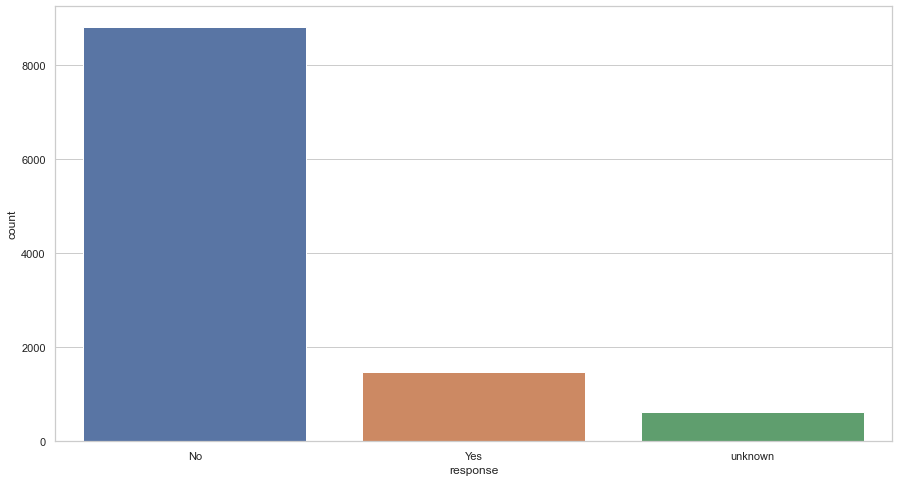

In [91]:
#Show a plot of the total number of responses (for each response type - "Yes"/"No").
sns.countplot(x='response', data=df1);

#Show a plot of the rate of the response types by each Sales Channel.
- bar plot
- stacked bar plot (Tablaue


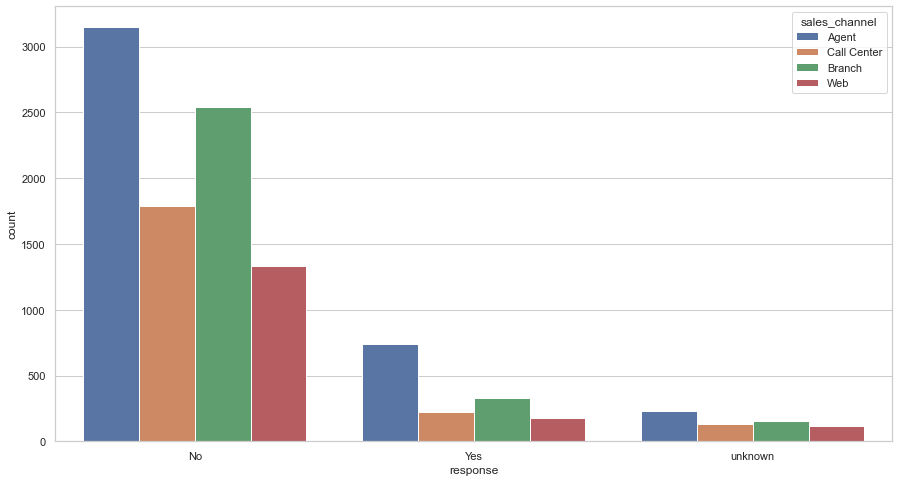

In [92]:
sns.countplot(x="response", hue="sales_channel", data=df1);

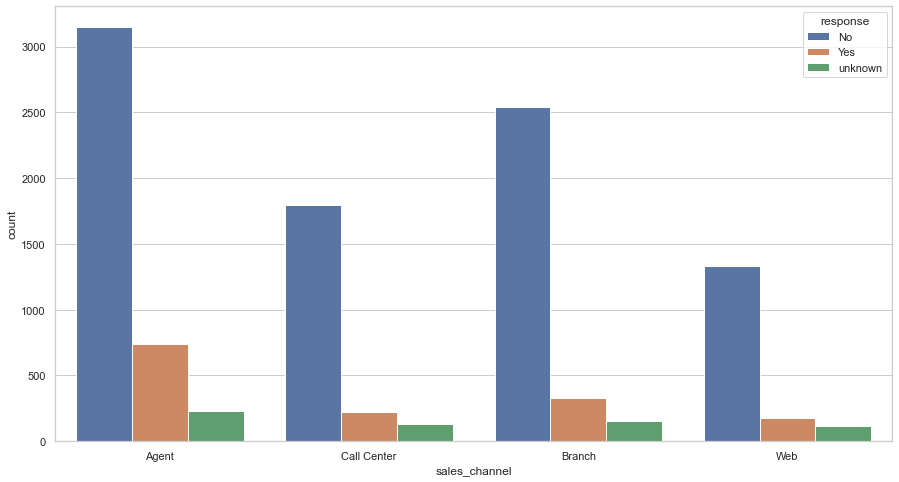

In [93]:
sns.countplot(x="sales_channel", hue="response", data=df1);

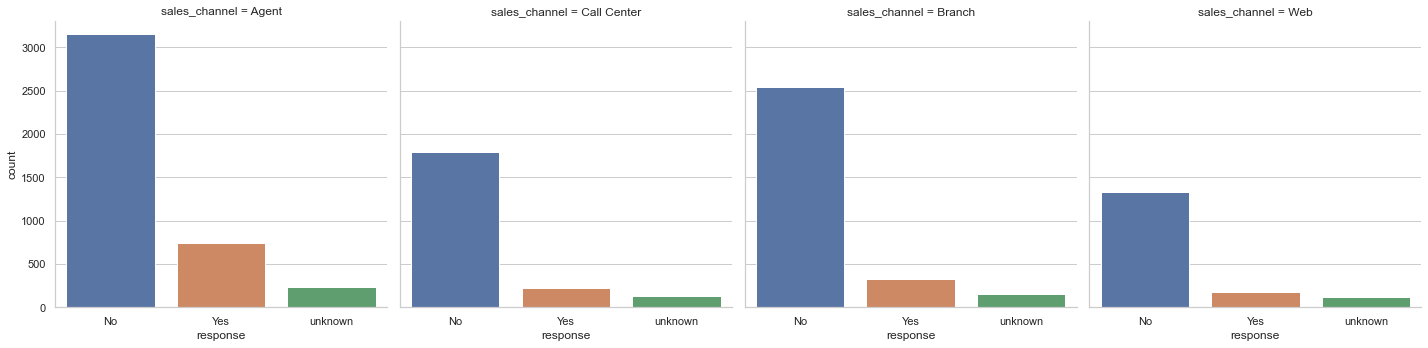

In [94]:
sns.catplot(x="response", col="sales_channel", data=df1, kind = 'count');

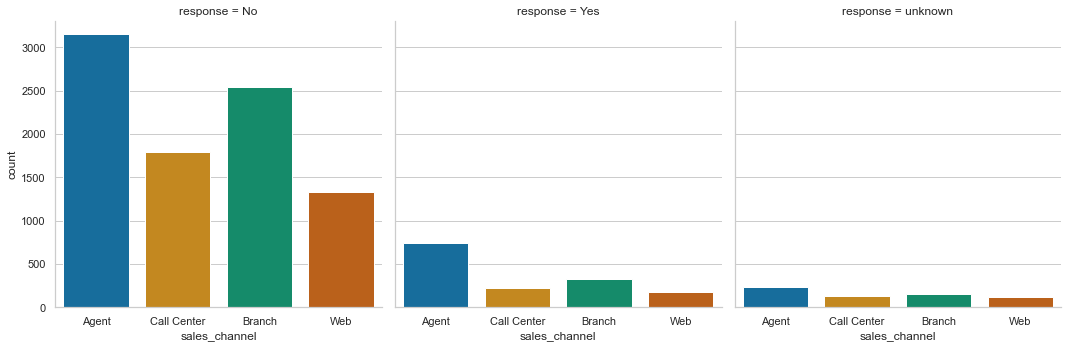

In [97]:
sns.catplot(x="sales_channel", col="response", data=df1, kind = 'count', palette = 'colorblind' );

Show a plot of the distribution of the Total Claim Amount, broken down by response type. Try a boxplot and distribution plot, for each response type. For the distribution plot, try to plot both kinds of responses in one chart (seaborn's histplot, using the 'hue' parameter is very convenient here).

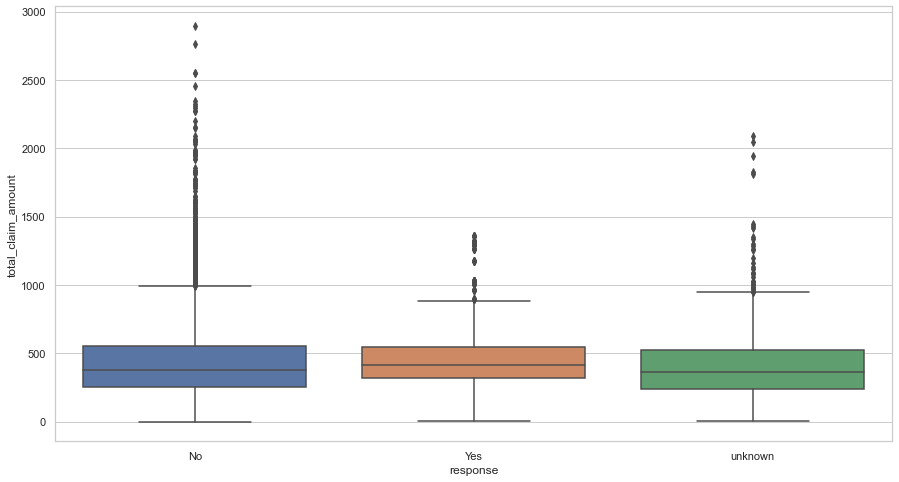

In [96]:
sns.boxplot(x='response', y='total_claim_amount', data=df1, palette = 'deep' );

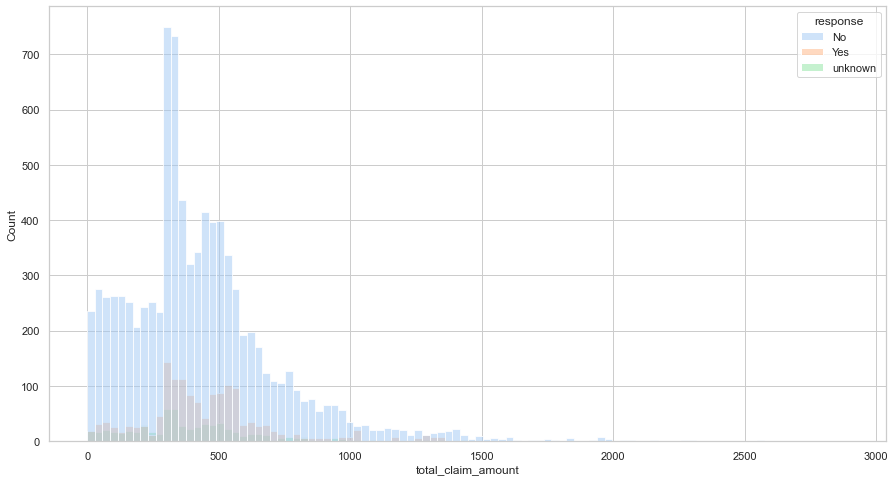

In [98]:
sns.histplot(data=df1, x="total_claim_amount", hue="response", bins = 100, palette = 'pastel');

#Create similar plots like in the task before, but for Income.

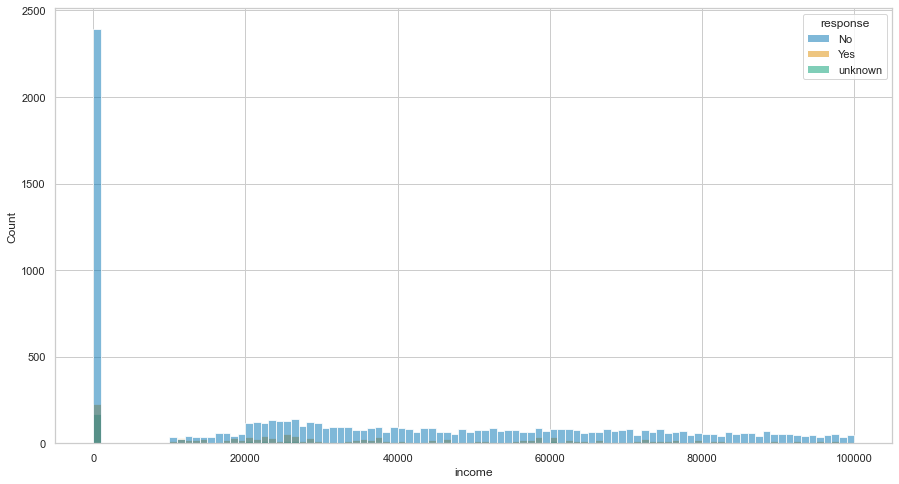

In [100]:
sns.histplot(data=df1, x="income", hue="response", bins = 100, palette = 'colorblind');

#Create a scatterplot between Total Claim Amount and Income. Play around with the settings of the scatterplot (markersize, alpha level, ...) and in doing so try to identify more features within the data just visually. You can also try different seaborn plots. Check for example this link which explains how to avoid overplotting.

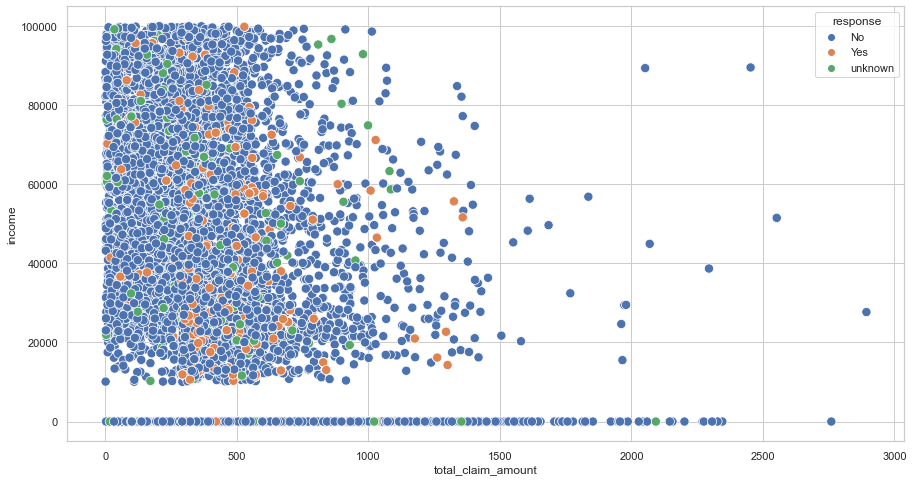

In [90]:
#overplotting
sns.scatterplot(x='total_claim_amount' , y='income', hue = 'response', s = 85, data=df1); #markersize = 100, data = df1);


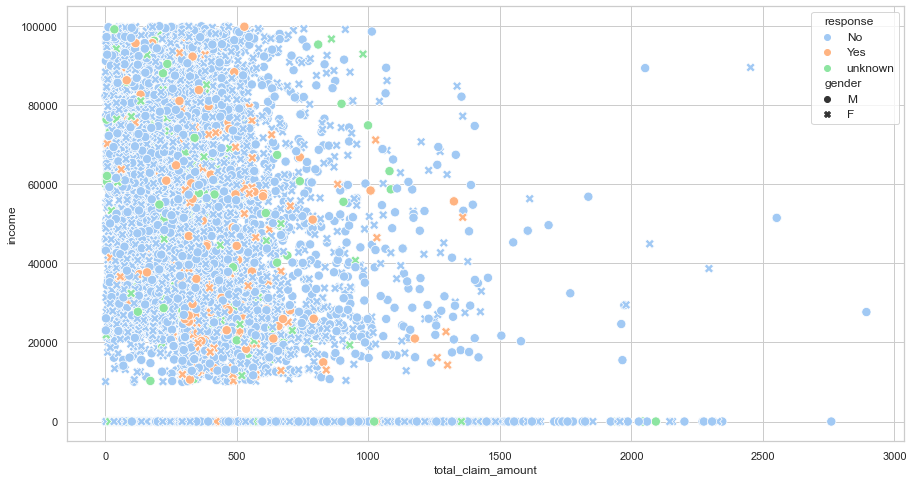

In [76]:
#overplotting
sns.scatterplot(x='total_claim_amount' , y='income', hue = 'response', s = 85, data=df1, palette = 'pastel', style = 'gender') #markersize = 100, data = df1);


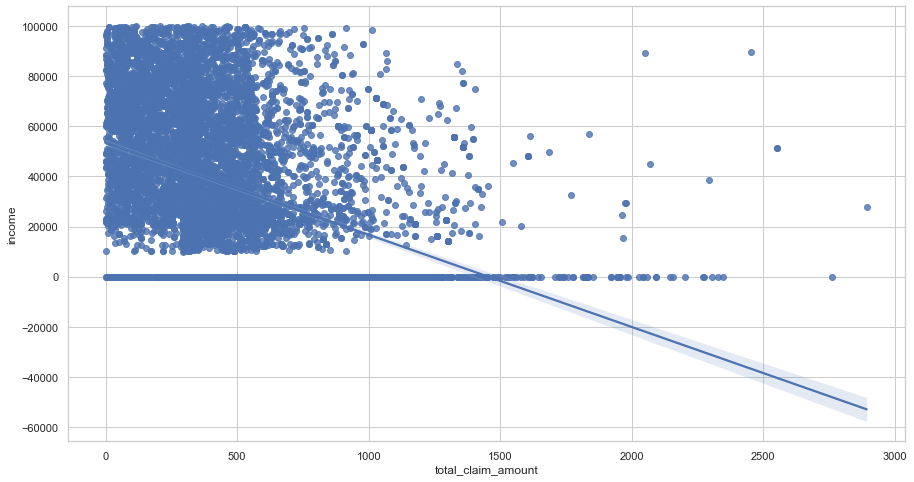

In [84]:
sns.regplot(x='total_claim_amount' , y='income', data=df1); #markersize = 100, data = df1);